In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ves

In [10]:
ab2 = np.logspace(0, 2.5, 21)
print(ab2)

[  1.           1.33352143   1.77827941   2.37137371   3.16227766
   4.21696503   5.62341325   7.49894209  10.          13.33521432
  17.7827941   23.71373706  31.6227766   42.16965034  56.23413252
  74.98942093 100.         133.35214322 177.827941   237.13737057
 316.22776602]


In [11]:
fopBlock = ves.VESModelling(ab2=ab2)
synth = [5, 10, 100, 300, 30]
data = fopBlock(synth)
# fig, ax = plt.subplots()
# fopBlock.drawData(ax, data);

In [12]:
thk = np.logspace(0, 1.5, 21)
# print(np.cumsum(thk))
fop = ves.VESRhoModelling(ab2=ab2, thk=thk)

19/08/24 - 15:44:53 - pyGIMLi - INFO - Found 1 regions.


In [13]:
inv = pg.Inversion(fop=fop)
inv.dataVals = data
inv.dataTrans = 'log'
inv.modelTrans = 'log'
inv.run(data, 0.02, startModel=100, maxIter=0)
# inv.model = pg.Vector(len(thk)+1, 100.0)
# inv.response = fop(inv.model)
# inv.errorVals = pg.Vector(len(data), 0.02)
# fop.createJacobian(inv.model)

22 [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

In [14]:
tD = inv.dataTrans
tM = inv.modelTrans
inv.inv.data()

21 [100.08745003995519, 100.20472957933309, 100.47468253725656, 101.08255952469044, 102.40201699889873, 105.10187350549336, 110.15229965805725, 118.46986010801419, 130.01867883069855, 142.7589588016519, 152.40052856212927, 153.61248780386995, 142.50415807390021, 119.44355701980608, 90.22029674416736, 63.43337214364316, 45.18876267422169, 35.92945207293708, 32.30612045020045, 31.03935979864852, 30.534076730026072]

22 [-0.12538952704246034, -0.2722672478341147, -0.3112472150459782, -0.2925367869788841, -0.2392863535223846, -0.16429041544735973, -0.0759740674959151, 0.0191109578791161, 0.11523574678236727, 0.20713355351116014, 0.2899908229552761, 0.35960058810346474, 0.4125580482544184, 0.4464352284599923, 0.459930428124011, 0.4530272943317008, 0.42718086257736076, 0.3854587629701751, 0.33245832396136765, 0.27381631770105375, 0.21530924054321363, 0.5082813155806353]


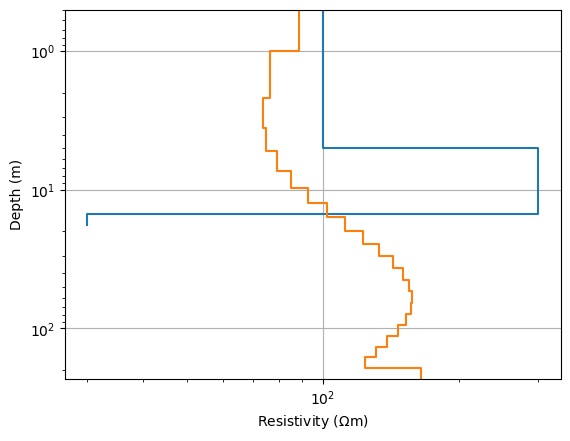

In [15]:
dg = inv.dataGradient()
print(dg)
fig, ax = plt.subplots()
pg.viewer.mpl.drawModel1D(ax, model=synth)
pg.viewer.mpl.drawModel1D(ax, thk, np.exp(dg*0.99)*inv.model, plot='loglog')


In [16]:
inv.chi2()

798.2147601805998

In [17]:
inv.model = np.exp(dg*0.99)*inv.model
inv.response = fop(inv.model)
fop.createJacobian(inv.model)
print(inv.chi2())

1432.59894332187


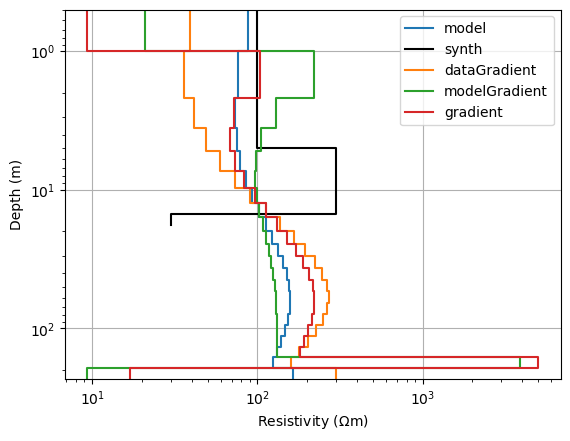

In [18]:
dg = inv.dataGradient()
mg = -inv.modelGradient() * 10
fig, ax = plt.subplots()
pg.viewer.mpl.drawModel1D(ax, thk, inv.model, label="model")
pg.viewer.mpl.drawModel1D(ax, model=synth, label="synth", color="black")
pg.viewer.mpl.drawModel1D(ax, thk, np.exp(dg*0.99)*inv.model, plot='loglog', label="dataGradient")
pg.viewer.mpl.drawModel1D(ax, thk, np.exp(mg*0.99)*inv.model, plot='loglog', label="modelGradient")
pg.viewer.mpl.drawModel1D(ax, thk, np.exp((mg+dg)*0.99)*inv.model, plot='loglog', label="gradient")
ax.legend()

In [19]:
from pygimli.frameworks import lineSearch

In [21]:
# from pygimli.frameworks.inversion import DescentInversion
# sd = DescentInversion(fop=fop)
# sd.dataTrans = 'log'
# sd.modelTrans = 'log'
# sd.lambdaFactor = 0.8
# sd.run(data, startModel=100, verbose=True)

In [22]:
inv = pg.Inversion(fop=fop)
inv.dataTrans = 'log'
inv.modelTrans = 'log'
inv.run(data, 0.02, startModel=100, correlationLengths=[3, 3, 3], maxIter=0)
print(inv.chi2())
for iter in range(30):
    inv.lam = 10*0.8**iter
    dm = -inv.gradient()
    tau, resp = lineSearch(inv, dm, method="exact", taumin=0.001, logScale=True)
    inv.model = np.exp(dm*tau)*inv.model
    inv.response = fop(inv.model)
    fop.createJacobian(inv.model)
    print(iter, tau, inv.chi2())

19/08/24 - 15:45:55 - pyGIMLi - INFO - Creating GeostatisticConstraintsMatrix for region 0 with: I=[3, 3, 3], dip=0, strike=0
19/08/24 - 15:45:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
19/08/24 - 15:45:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
19/08/24 - 15:45:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 45 Cells: 44 Boundaries: 23
19/08/24 - 15:45:55 - pyGIMLi - INFO - Cache c:\Guenther.T\src\gimli\gimli\pygimli\math\matrix.py:createCm05 restored (0.0s x 20): C:\Guenther.T\Anwendungsdaten\pygimli\Cache\7947269444493245716


798.2147601805998
0 1.0 372.60127632699005
1 1.0 224.19951212621214
2 0.08912509381337455 180.95259724757184
3 0.001 181.08401443982999
4 0.3548133892335753 148.57931536559641
5 0.12589254117941676 132.4152733805316
6 0.25118864315095796 114.35025597652339
7 0.25118864315095796 86.05115039220554
8 0.3548133892335753 74.54375138857516
9 0.3548133892335753 53.148683961835644
10 0.501187233627272 42.09491225249528
11 0.501187233627272 39.150502570937036
12 0.12589254117941676 34.99793474055051
13 0.0446683592150963 34.995676385295305
14 1.0 34.67513157618349
15 0.3548133892335753 22.516957455258318
16 0.707945784384138 17.491721703105696
17 0.501187233627272 13.316809870395817
18 0.501187233627272 10.591501837842443
19 0.707945784384138 8.414849470899815
20 0.3548133892335753 6.7138246505307215
21 1.0 4.988792499842007
22 0.501187233627272 4.282488016900312
23 0.501187233627272 3.7452171511233674
24 0.707945784384138 3.315417582591784
25 0.501187233627272 2.9753098064445394
26 0.501187233

In [ ]:
plt.plot(inv.chi2)

0.4006
0.4006


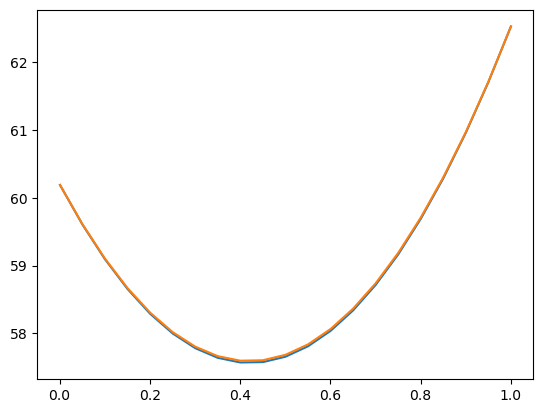

In [ ]:
dm = -inv.gradient()
# print(lineSearch(inv, dm, method="exact", taumin=0.001, logScale=True)[0])
print(lineSearch(inv, dm, method="exact", taumin=0.001, logScale=False, show=True)[0])
# print(lineSearch(inv, dm, method="inter", taumin=0.001, logScale=True)[0])
print(lineSearch(inv, dm, method="inter", taumin=0.001, logScale=False, show=True)[0])

(0.4215941896874483, None)

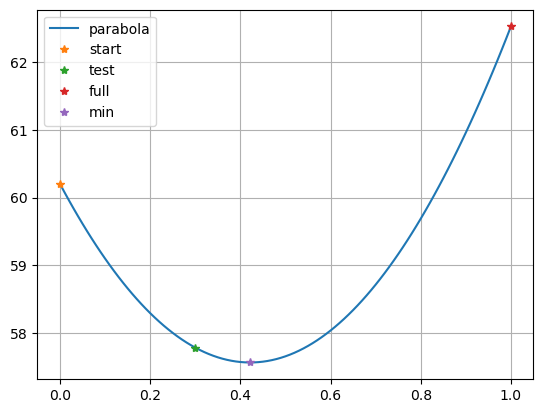

In [ ]:
lineSearch(inv, dm, method="quad", show=True)

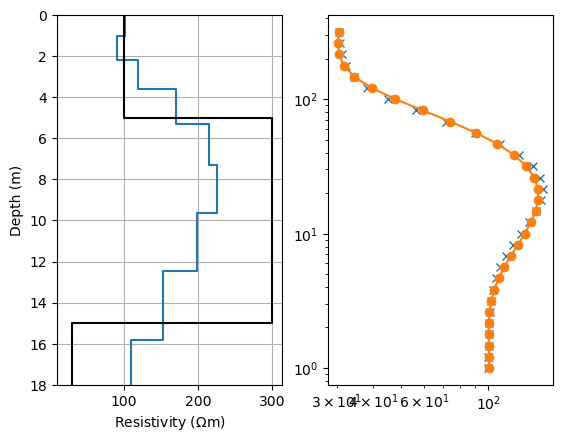

In [ ]:
fig, ax = plt.subplots(ncols=2)
pg.viewer.mpl.drawModel1D(ax[0], thk, inv.model, label="model")
pg.viewer.mpl.drawModel1D(ax[0], model=synth, label="synth", color="black")
ax[1].loglog(data, ab2, "x")
ax[1].loglog(inv.response, ab2, "o-", label="response")

In [ ]:
from pygimli.core.trans import str2Trans

In [ ]:
print(str2Trans('symlog0.01'))